<a href="https://colab.research.google.com/github/Knowsoeun/AI_Study/blob/main/%ED%95%99%EC%8A%B5%EB%90%9CCNN%EC%9D%B4%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 패키지 임포트
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model # model을 읽고 처리할 때 필요한 패키지

import matplotlib.pyplot as plt
import numpy as np # model을 읽고 처리할 때 필요한 패키지


In [5]:
# MNIST 데이터 셋을 가져와서 가공한다.
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# 모델을 읽어오는 부분
# 모델을 읽어온다.
model = load_model('mnist_cnn.h5') #파일명 입력해준다.

# 읽어온 모델 요약본 보기
model.summary()

OSError: ignored

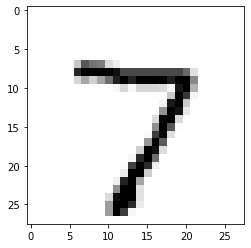

NameError: ignored

In [7]:
# test 이미지 중에 하나를 골라서 몇 개 보여주고 그 안에서 model이 어떻게 예측하는지 보여준다.
n = 0 # n번 이미지를 가져와서
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest') # n번 이미지를 보여주고
plt.show()
print('The Answer is ', 
        np.argmax(model.predict(x_test[n].reshape((1, 28, 28, 1))), axis=-1)) # n번 이미지를 model에 넣어서 예측결과를 확인한다.

In [ ]:
# 틀린 것을 보여준다.
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)
wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

count = 0
nrows = 4
ncols = 4
plt.figure(figsize=(12,8))

for n in wrong_result:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)
    if count == 16:
        break

plt.tight_layout()
plt.show()